In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.3.4
Uninstalling matplotlib-3.3.4:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.3.4-py3.8-nspkg.pth
    /usr/local/lib/python3.8/dist-packages/matplotlib-3.3.4.dist-info/*
    /usr/local/lib/python3.8/dist-packages/matplotlib/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.8/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.8/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.3.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp38-cp38-manylinux1_x86_64.whl (13.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the pac

In [2]:
!pip install scanpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 5.0 MB/s 
     |████████████████████████████████| 9.4 MB 37.3 MB/s 
     |████████████████████████████████| 96 kB 3.2 MB/s 
     |████████████████████████████████| 88 kB 2.3 MB/s 
     |████████████████████████████████| 295 kB 67.1 MB/s 
     |████████████████████████████████| 965 kB 69.0 MB/s 
     |████████████████████████████████| 1.1 MB 56.7 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=651ab6ae43d4d564255523d857e6ec10dfce97772d0feb6c5a79d1082eef51b2
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=09e6f437bb201ac32c90d957dce24b92253c2d6492c42fb6708b3f35204b8d70
  Stored in directo

In [20]:
!pip3 install leidenalg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 5.0 MB/s 
     |████████████████████████████████| 3.3 MB 39.8 MB/s 


In [2]:
sc.logging.print_versions()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 3


-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                         7.1.2
astor                       0.8.1
backcall                    0.2.0
beta_ufunc                  NA
binom_ufunc                 NA
certifi                     2022.09.24
cffi                        1.15.1
cloudpickle                 1.5.0
cycler                      0.10.0
cython_runtime              NA
dask                        2022.02.1
dateutil                    2.8.2
debugpy                     1.0.0
decorator                   4.4.2
fsspec                      2022.11.0
google                      NA
h5py                        3.1.0
httplib2                    0.17.4
igraph                      0.10.2
ipykernel                   5.3.4
ipython_genutils            0.2.0
ipywidgets                  7.7.1
jinja2                      2.11.3
joblib                      1.2.0
kiwisolver                  1.4.4
leidenalg                   0.9.0
llvmlite                    0.39.1
markupsafe                 

In [3]:
adata = sc.datasets.visium_sge(sample_id="V1_Human_Lymph_Node")
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

reading /content/data/V1_Human_Lymph_Node/filtered_feature_bc_matrix.h5
 (0:00:01)


/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

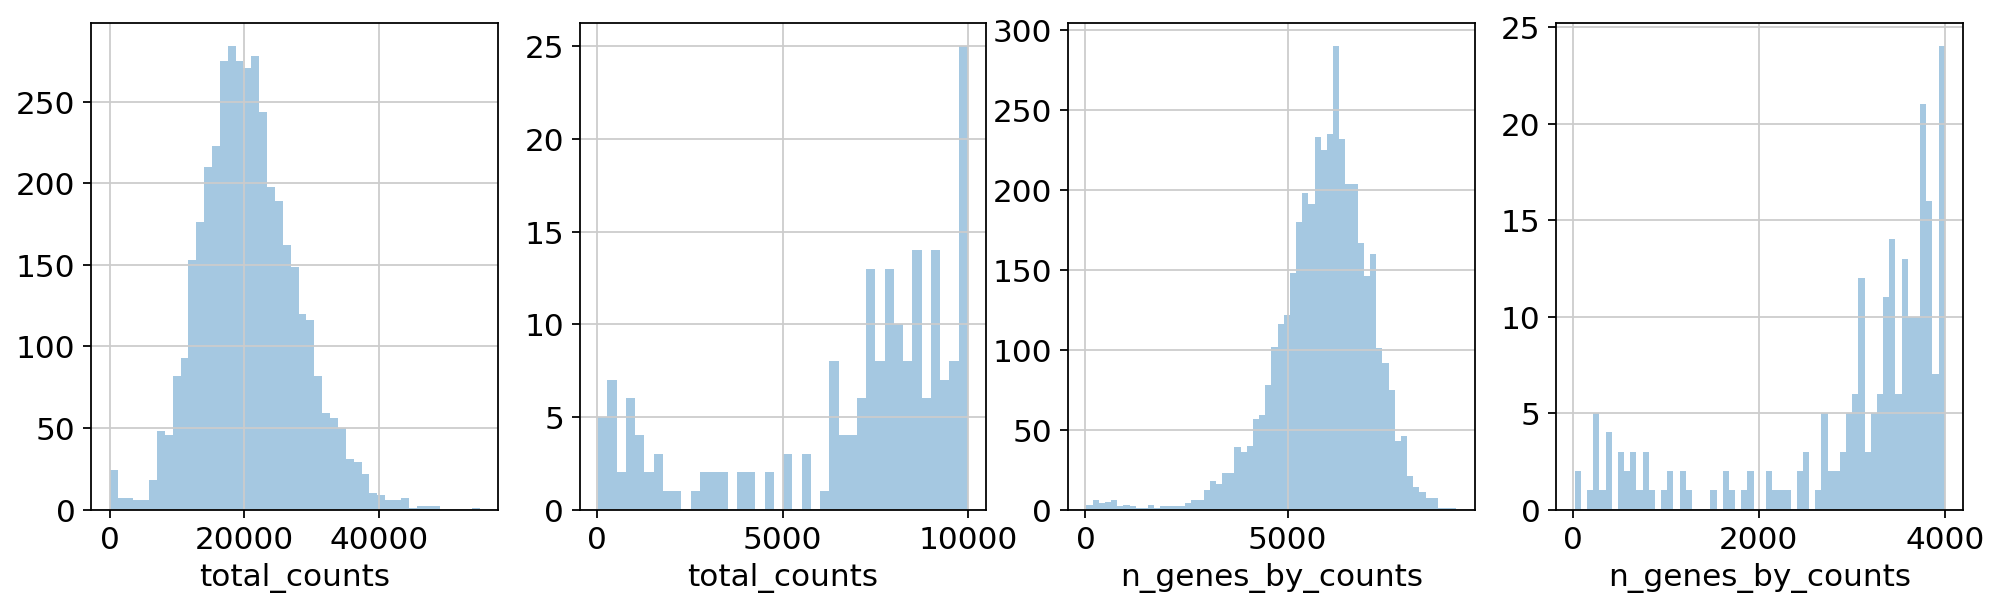

In [4]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.distplot(adata.obs["total_counts"][adata.obs["total_counts"] < 10000], kde=False, bins=40, ax=axs[1])
sns.distplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.distplot(adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 4000], kde=False, bins=60, ax=axs[3])

In [16]:
sc.pp.filter_cells(adata, min_counts=5000)
sc.pp.filter_cells(adata, max_counts=35000)
adata = adata[adata.obs["pct_counts_mt"] < 20]
print(f"#cells after MT filter: {adata.n_obs}")
sc.pp.filter_genes(adata, min_cells=10)

filtered out 50 cells that have less than 5000 counts
#cells after MT filter: 3811
filtered out 8 genes that are detected in less than 10 cells


/usr/local/lib/python3.8/dist-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


In [17]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)

normalizing counts per cell
    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [18]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="clusters")

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:02)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:13)
running Leiden clustering
    finished: found 10 clusters and added
    'clusters', the cluster labels (adata.obs, categorical) (0:00:00)


TypeError: ignored

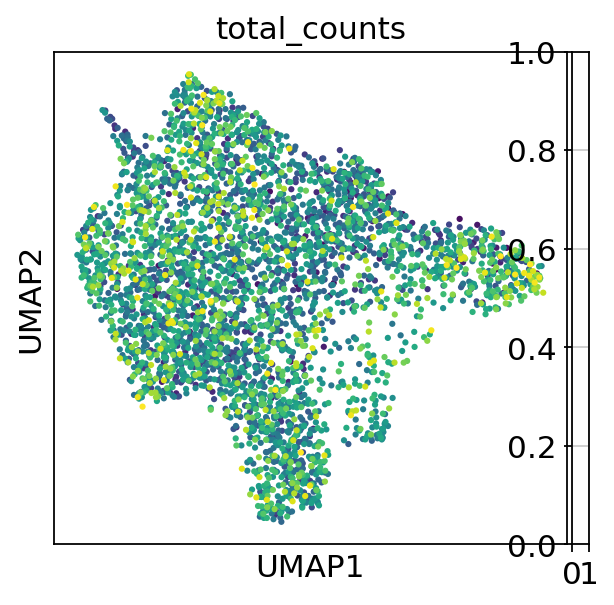

In [19]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "clusters"], wspace=0.4)

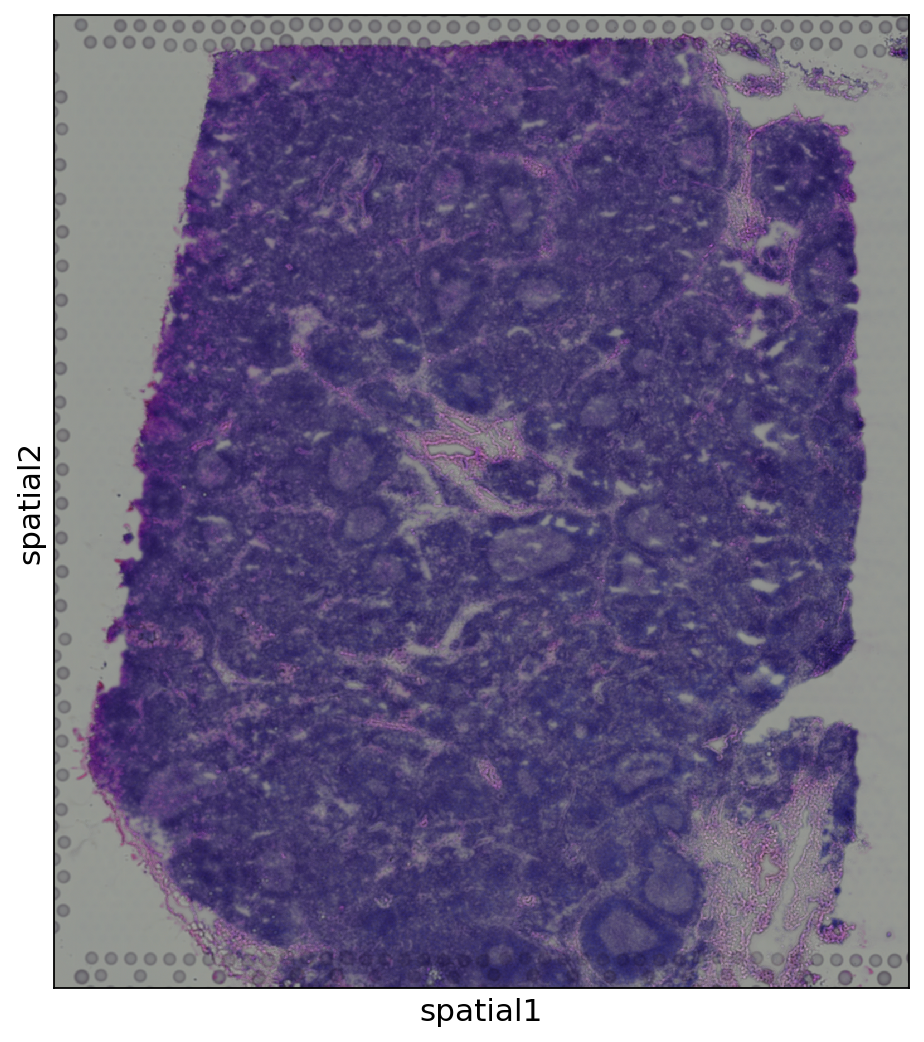

In [20]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata)

In [12]:
adata.obs

in_tissue  array_row  array_col  n_genes_by_counts  \
AAACAAGTATCTCCCA-1          1         50        102               6732   
AAACAATCTACTAGCA-1          1          3         43               6759   
AAACAGAGCGACTCCT-1          1         14         94               7236   
AAACAGCTTTCAGAAG-1          1         43          9               6890   
AAACAGGGTCTATATT-1          1         47         13               7631   
...                       ...        ...        ...                ...   
TTGTTTCACATCCAGG-1          1         58         42               5771   
TTGTTTCATTAGTCTA-1          1         60         30               6354   
TTGTTTCCATACAACT-1          1         45         27               6517   
TTGTTTGTATTACACG-1          1         73         41               4476   
TTGTTTGTGTAAATTC-1          1          7         51               7183   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AAACAAGTATCTCCCA-1                 8.814776       27944.0           10.237993   
AAACAATCTACTAGCA-1                 8.818778       25685.0           10.153702   
AAACAGAGCGACTCCT-1                 8.886962       31916.0           10.370894   
AAACAGCTTTCAGAAG-1                 8.837971       30932.0           10.339579   
AAACAGGGTCTATATT-1                 8.940105       31728.0           10.364986   
...                                     ...           ...                 ...   
TTGTTTCACATCCAGG-1                 8.660774       19649.0            9.885833   
TTGTTTCATTAGTCTA-1                 8.756997       21557.0            9.978502   
TTGTTTCCATACAACT-1                 8.782323       22175.0           10.006766   
TTGTTTGTATTACACG-1                 8.406708       12268.0            9.414831   
TTGTTTGTGTAAATTC-1                 8.879612       30022.0           10.309719   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACAAGTATCTCCCA-1                   33.241483                    41.071429   
AAACAATCTACTAGCA-1                   23.507884                    33.965349   
AAACAGAGCGACTCCT-1                   21.948239                    31.990224   
AAACAGCTTTCAGAAG-1                   26.357817                    38.132032   
AAACAGGGTCTATATT-1                   22.462809                    31.360313   
...                                        ...                          ...   
TTGTTTCACATCCAGG-1                   27.131152                    35.950939   
TTGTTTCATTAGTCTA-1                   24.238067                    32.263302   
TTGTTTCCATACAACT-1                   21.506201                    30.593010   
TTGTTTGTATTACACG-1                   24.078904                    34.268014   
TTGTTTGTGTAAATTC-1                   24.938379                    35.124242   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
AAACAAGTATCTCCCA-1                    48.375322                    57.572287   
AAACAATCTACTAGCA-1                    42.631886                    53.054312   
AAACAGAGCGACTCCT-1                    41.101642                    52.603710   
AAACAGCTTTCAGAAG-1                    47.575327                    57.590844   
AAACAGGGTCTATATT-1                    39.696798                    50.107161   
...                                         ...                          ...   
TTGTTTCACATCCAGG-1                    44.429742                    55.000254   
TTGTTTCATTAGTCTA-1                    40.265343                    51.152758   
TTGTTTCCATACAACT-1                    39.098083                    50.119504   
TTGTTTGTATTACACG-1                    43.193675                    54.964134   
TTGTTTGTGTAAATTC-1                    43.484778                    53.767237   

                    total_counts_mt  log1p_total_counts_mt  pct_counts_mt  \
AAACAAGTATCTCCCA-1            248.0               5.517453       0.887489   
AAACAATCTACTAGCA-1            239.0               5.480639       0.930504   
AAACAGAGCGACTCCT-

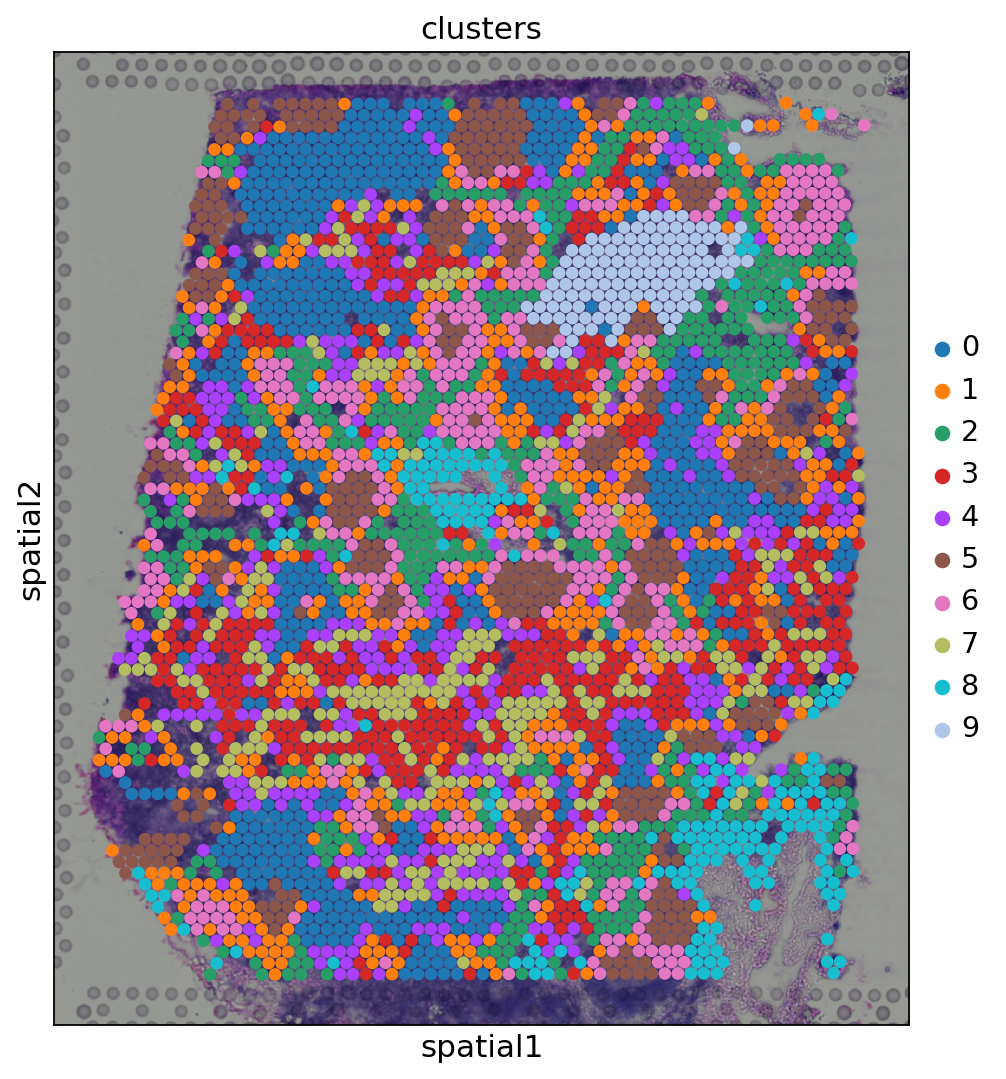

In [21]:
sc.pl.spatial(adata, img_key="hires", color="clusters", size=1.5)


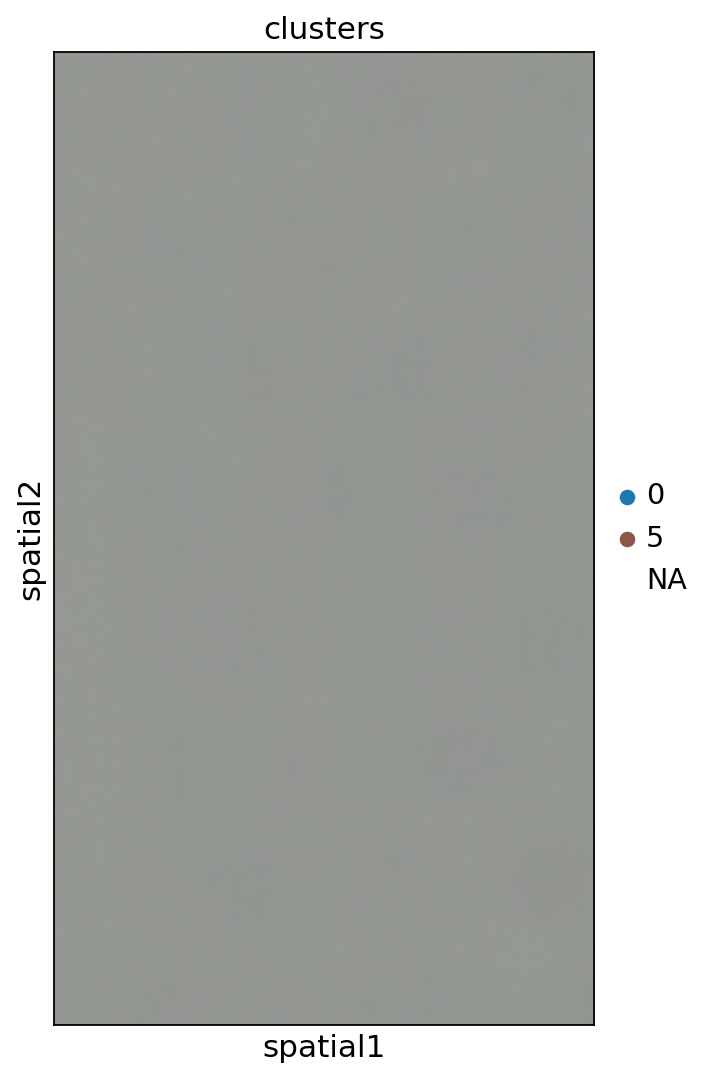

In [23]:
sc.pl.spatial(adata, img_key="hires", color="clusters", groups=["0", "5"], crop_coord=[1200, 1700, 1900, 1000], alpha=0.5, size=1.3)


ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)
categories: 0, 1, 2, etc.
var_group_labels: 5


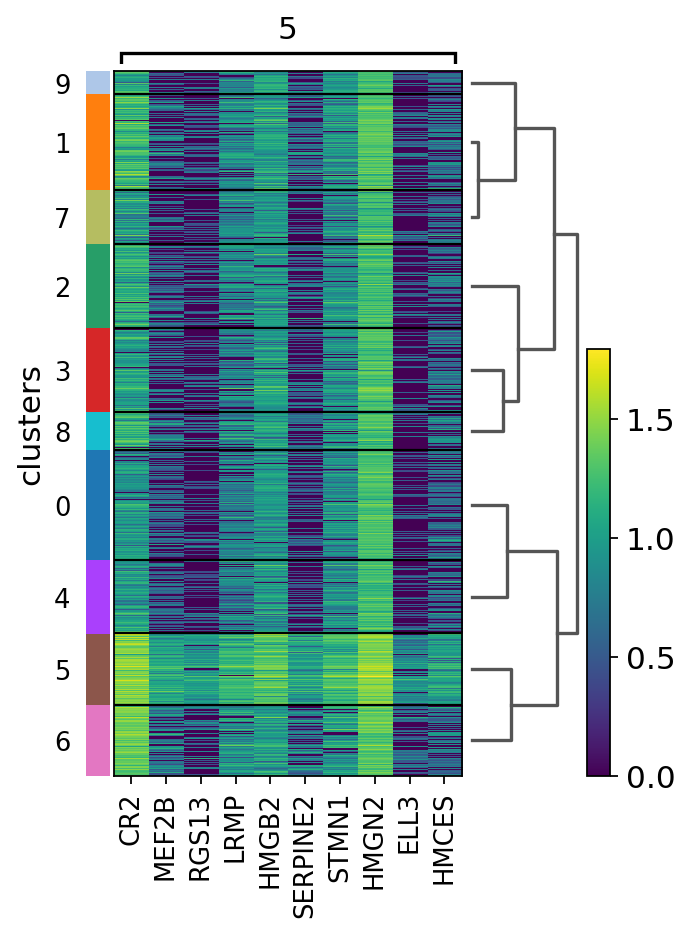

In [25]:
sc.tl.rank_genes_groups(adata, "clusters", method="t-test")
sc.pl.rank_genes_groups_heatmap(adata, groups="5", n_genes=10, groupby="clusters")

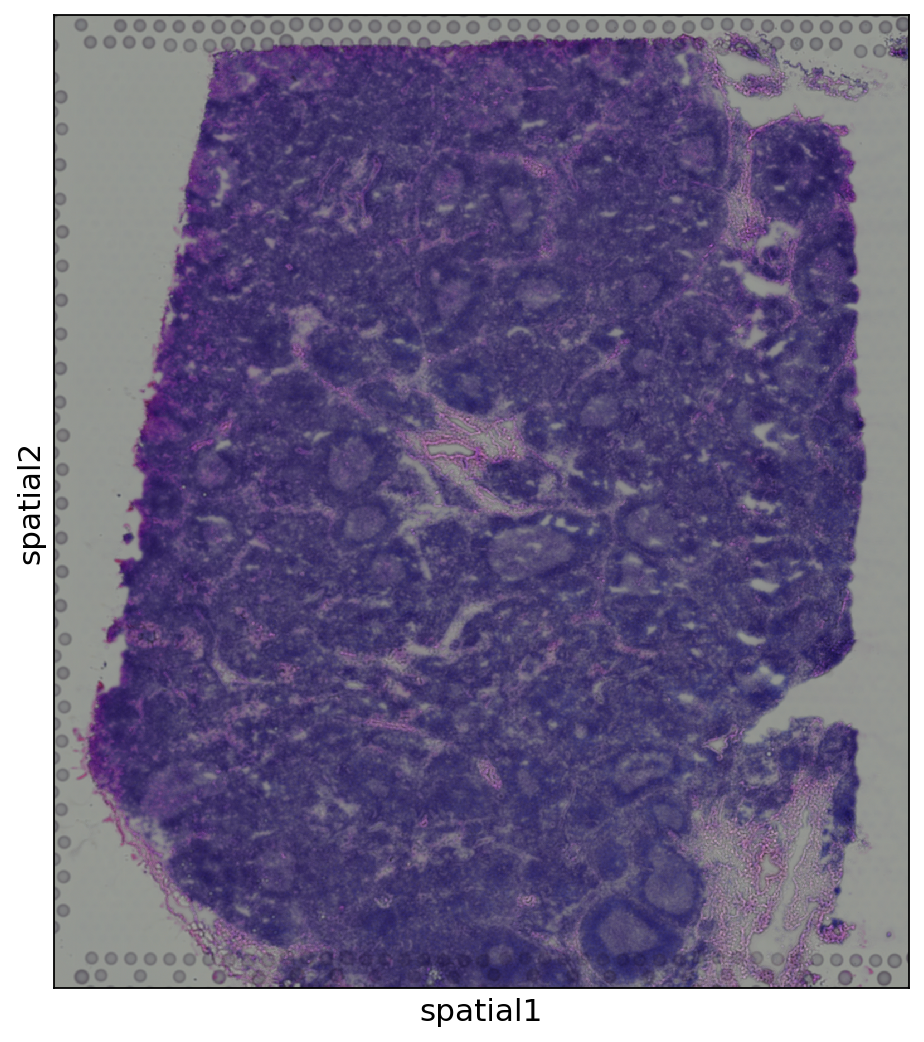

In [29]:
sc.pl.spatial(adata, img_key="hires")
